# Práctica 5: Palabras a Vectores

<img src="http://ruder.io/content/images/2016/04/word_embeddings_colah.png" width="300" heitgh="300">

## Objetivo

- Explorar representaciones vectoriales de palabras
    - Basados en Frecuencias
    - Usando TF-IDF
    - Word2Vec
- Medir la similitud entre dos vectores
- Manipulación de representaciones vectoriales previamente entrenadas
- Entrenar representaciones usando `gensim`

## ¿Cómo representamos las palabra?

Las palabras tienen un significado y nos da una imagen mental

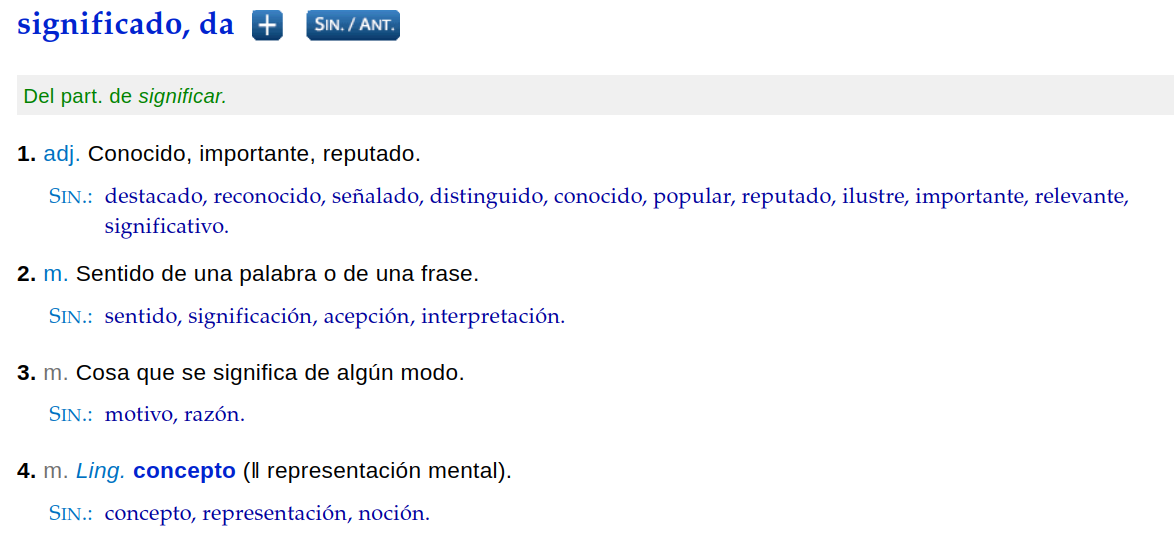


###Interpretación lingüística

- Significante -> Significado

Interpretamos el signo lingüístico

<img src="https://pymstatic.com/22726/conversions/diferencias-significado-significante-social.jpg" width=500>

## Haciendo útil al significado para las computadoras (solo inglés)

Una forma de almacenar las relaciones semánticas de las palabras fue usando WordNets. Una suerte de diccionario + tesauro[1] para automatizar tareas de análisis de textos

[1]: https://es.wikipedia.org/wiki/Tesauro

In [1]:
import nltk

nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from nltk.corpus import wordnet as wn

bear = wn.synset("bear.n.01")
hyper = lambda s: s.hypernyms()
list(bear.closure(hyper))

[Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [3]:
wn.synonyms("auto", lang="spa")

[['automóvil', 'carro', 'coche', 'máquina', 'turismo', 'vehículo'],
 ['decreto', 'edicto', 'sentencia'],
 ['misterio']]

### Desventajas

- Como las cosas basadas en reglas es díficil de mantener en el tiempo
  - Nuevas palabras
  - Subjetivo
  - Requiere muchisimo trabajo manual especializado

 ## Representaciones vectoriales


- Sabemos que las computadoras son buenas computando numero no textos crudo
  - Especialemente metodos de ML que son los que utilizamos para resolver tareas
  - Clasificacion de documentos
  - Rankear documentos por reelevancia dada una query
- Buscamos una forma de mapear textos -> **espacio vectorial**
 - Un enfoque muy utilizado es la Bolsa de Palabras (Bag of Words)
   - Matriz de documentos-terminos
   - Cada fila es un vector con $N$ features donde las features serán el vocabulario del corpus

<img src="https://sep.com/wp-content/uploads/2020/12/2020-07-bagofwords.jpg">

In [4]:
import gensim

In [5]:
doc_1 = "Augusta Ada King, condesa de Lovelace (Londres, 10 de diciembre de 1815-íd., 27 de noviembre de 1852), registrada al nacer como Augusta Ada Byron y conocida habitualmente como Ada Lovelace, fue una matemática y escritora británica, célebre sobre todo por su trabajo acerca de la computadora mecánica de uso general de Charles Babbage, la denominada máquina analítica. Fue la primera en reconocer que la máquina tenía aplicaciones más allá del cálculo puro y en haber publicado lo que se reconoce hoy como el primer algoritmo destinado a ser procesado por una máquina, por lo que se le considera como la primera programadora de ordenadores."
doc_2 = "Brassica oleracea var. italica, el brócoli,1​ brécol2​ o bróquil3​ del italiano broccoli (brote), es una planta de la familia de las brasicáceas. Existen otras variedades de la misma especie, tales como: repollo (B. o. capitata), la coliflor (B. o. botrytis), el colinabo (B. o. gongylodes) y la col de Bruselas (B. o. gemmifera). El llamado brócoli chino o kai-lan (B. o. alboglabra) es también una variedad de Brassica oleracea."
doc_3 = "La bicicleta de piñón fijo, fixie o fixed es una bicicleta monomarcha, que no tiene piñón libre, lo que significa que no tiene punto muerto; es decir, los pedales están siempre en movimiento cuando la bicicleta está en marcha. Esto significa que no se puede dejar de pedalear, ya que, mientras la rueda trasera gire, la cadena y los pedales girarán siempre solidariamente. Por este motivo, se puede frenar haciendo una fuerza inversa al sentido de la marcha, y también ir marcha atrás."

In [6]:
documents = [doc_1, doc_2, doc_3]

In [7]:
from gensim.utils import simple_preprocess

def sent_to_words(sentences: list[str]) -> list[list[str]]:
    """Function convert sentences to words

    Use the tokenizer provided by gensim using
    `simple_process()` which remove punctuation and converte
    to lowercase (`deacc=True`)
    """
    return [simple_preprocess(sent, deacc=True) for sent in sentences]


In [9]:
docs_tokenized = sent_to_words(documents)
docs_tokenized[2][:10]

['la',
 'bicicleta',
 'de',
 'pinon',
 'fijo',
 'fixie',
 'fixed',
 'es',
 'una',
 'bicicleta']

In [10]:
from gensim.corpora import Dictionary

gensim_dic = Dictionary()
bag_of_words_corpus = [gensim_dic.doc2bow(doc, allow_update=True) for doc in docs_tokenized]

In [11]:
type(gensim_dic)

gensim.corpora.dictionary.Dictionary

In [12]:
for k, v in gensim_dic.iteritems():
    print(k, v)

0 acerca
1 ada
2 al
3 algoritmo
4 alla
5 analitica
6 aplicaciones
7 augusta
8 babbage
9 britanica
10 byron
11 calculo
12 celebre
13 charles
14 como
15 computadora
16 condesa
17 conocida
18 considera
19 de
20 del
21 denominada
22 destinado
23 diciembre
24 el
25 en
26 escritora
27 fue
28 general
29 haber
30 habitualmente
31 hoy
32 id
33 king
34 la
35 le
36 lo
37 londres
38 lovelace
39 maquina
40 mas
41 matematica
42 mecanica
43 nacer
44 noviembre
45 ordenadores
46 por
47 primer
48 primera
49 procesado
50 programadora
51 publicado
52 puro
53 que
54 reconoce
55 reconocer
56 registrada
57 se
58 ser
59 sobre
60 su
61 tenia
62 todo
63 trabajo
64 una
65 uso
66 alboglabra
67 botrytis
68 brasicaceas
69 brassica
70 brecol
71 broccoli
72 brocoli
73 broquil
74 brote
75 bruselas
76 capitata
77 chino
78 col
79 coliflor
80 colinabo
81 es
82 especie
83 existen
84 familia
85 gemmifera
86 gongylodes
87 italiano
88 italica
89 kai
90 lan
91 las
92 llamado
93 misma
94 oleracea
95 otras
96 planta
97 repollo


In [13]:
print(len(bag_of_words_corpus))
bag_of_words_corpus[0]

3


[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 4),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 9),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 5),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 3),
 (47, 1),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 3),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 2),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 1)]

In [14]:
def bag_to_dict(bag_of_words: list, gensim_dic: Dictionary, titles: list[str]) -> list:
    data = {}
    for doc, title in zip(bag_of_words, titles):
        data[title] = dict([(gensim_dic[id], freq) for id, freq in doc])
    return data

In [15]:
data = bag_to_dict(bag_of_words_corpus, gensim_dic, titles=["ADA", "BROCOLI", "FIXED"])

In [16]:
data

{'ADA': {'acerca': 1,
  'ada': 3,
  'al': 1,
  'algoritmo': 1,
  'alla': 1,
  'analitica': 1,
  'aplicaciones': 1,
  'augusta': 2,
  'babbage': 1,
  'britanica': 1,
  'byron': 1,
  'calculo': 1,
  'celebre': 1,
  'charles': 1,
  'como': 4,
  'computadora': 1,
  'condesa': 1,
  'conocida': 1,
  'considera': 1,
  'de': 9,
  'del': 1,
  'denominada': 1,
  'destinado': 1,
  'diciembre': 1,
  'el': 1,
  'en': 2,
  'escritora': 1,
  'fue': 2,
  'general': 1,
  'haber': 1,
  'habitualmente': 1,
  'hoy': 1,
  'id': 1,
  'king': 1,
  'la': 5,
  'le': 1,
  'lo': 2,
  'londres': 1,
  'lovelace': 2,
  'maquina': 3,
  'mas': 1,
  'matematica': 1,
  'mecanica': 1,
  'nacer': 1,
  'noviembre': 1,
  'ordenadores': 1,
  'por': 3,
  'primer': 1,
  'primera': 2,
  'procesado': 1,
  'programadora': 1,
  'publicado': 1,
  'puro': 1,
  'que': 3,
  'reconoce': 1,
  'reconocer': 1,
  'registrada': 1,
  'se': 2,
  'ser': 1,
  'sobre': 1,
  'su': 1,
  'tenia': 1,
  'todo': 1,
  'trabajo': 1,
  'una': 2,
  'uso'

In [17]:
import pandas as pd

doc_matrix_simple = pd.DataFrame(data).fillna(0).astype(int).T

In [18]:
doc_matrix_simple

,acerca,ada,al,algoritmo,alla,analitica,aplicaciones,augusta,babbage,britanica,...,puede,punto,rueda,sentido,siempre,significa,solidariamente,tiene,trasera,ya
ADA,1,3,1,1,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
BROCOLI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIXED,0,0,1,0,0,0,0,0,0,0,...,2,1,1,1,2,2,1,2,1,1


- Tenemos una matrix de terminos-frecuencias ($tf$). Es decir cuantas veces un termino aparece en cierto documento.
- Una variante de esta es una **BoW** binaria. ¿Cómo se vería?


## ¿Ven algun problema?

- Palabras muy frecuentes que no aportan signifiancia
- Los pesos de las palabras son tratados de forma equitativa
    - Palabras muy frecuentes opacan las menos frecuentes y con mayor significado (semántico) en nuestros documentos
- Las palabras frecuentes no nos ayudarian a discriminar por ejemplo entre documentos

## *Term frequency-Inverse Document Frequency* (TF-IDF) al rescate

<center><img src="https://telencuestas.imgix.net/blog/como-ponderar-una-muestra.jpg?auto=format&fit=max&w=3840" height=250></center>

- Metodo de ponderación creado para algoritmos de Information Retrieval
- Bueno para clasificación de documentos y clustering
- Se calcula con la multiplicacion $tf_{d,t} \cdot idf_t$

Donde:
  - $tf_{d,t}$ es la frecuencia del termino en un documento $d$
  - $idf_t$ es la frecuencia inversa del termino en toda la colección de documentos. Se calcula de la siguiente forma:

$$idf_t = log_2\frac{N}{df_t}$$

Entonces:

$$tf\_idf(d,t) = tf_{d,t} ⋅ \log_2\frac{N}{df_t}$$

### Codificando TF-IDF con gensim

In [19]:
from gensim.models import TfidfModel

tfidf = TfidfModel(bag_of_words_corpus, smartirs="ntc")

In [20]:
bag_of_words_corpus[0]

[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 4),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 9),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 5),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 3),
 (47, 1),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 3),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 2),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 1)]

In [21]:
tfidf[bag_of_words_corpus[0]]

[(0, 0.10051035884473423),
 (1, 0.3015310765342027),
 (2, 0.05025517942236712),
 (3, 0.10051035884473423),
 (4, 0.10051035884473423),
 (5, 0.10051035884473423),
 (6, 0.10051035884473423),
 (7, 0.20102071768946847),
 (8, 0.10051035884473423),
 (9, 0.10051035884473423),
 (10, 0.10051035884473423),
 (11, 0.10051035884473423),
 (12, 0.10051035884473423),
 (13, 0.10051035884473423),
 (14, 0.20102071768946847),
 (15, 0.10051035884473423),
 (16, 0.10051035884473423),
 (17, 0.10051035884473423),
 (18, 0.10051035884473423),
 (19, 0.1877200559394197),
 (20, 0.05025517942236712),
 (21, 0.10051035884473423),
 (22, 0.10051035884473423),
 (23, 0.10051035884473423),
 (24, 0.05025517942236712),
 (25, 0.10051035884473423),
 (26, 0.10051035884473423),
 (27, 0.20102071768946847),
 (28, 0.10051035884473423),
 (29, 0.10051035884473423),
 (30, 0.10051035884473423),
 (31, 0.10051035884473423),
 (32, 0.10051035884473423),
 (33, 0.10051035884473423),
 (34, 0.10428891996634428),
 (35, 0.10051035884473423),
 (36

In [22]:
def bag_to_dict(bag_of_words: list, gensim_dic: Dictionary, titles: list[str]) -> list:
    data = {}
    tfidf = TfidfModel(bag_of_words, smartirs="ntc")
    for doc, title in zip(tfidf[bag_of_words], titles):
        data[title] = dict([(gensim_dic[id], freq) for id, freq in doc])
    return data

In [23]:
data = bag_to_dict(tfidf[bag_of_words_corpus], gensim_dic, titles=["ADA", "BROCOLI", "FIXED"])

ADA
BROCOLI
FIXED


In [24]:
data

{'ADA': {'acerca': 0.10829559492364334,
  'ada': 0.32488678477092997,
  'al': 0.027073898730910834,
  'algoritmo': 0.10829559492364334,
  'alla': 0.10829559492364334,
  'analitica': 0.10829559492364334,
  'aplicaciones': 0.10829559492364334,
  'augusta': 0.21659118984728667,
  'babbage': 0.10829559492364334,
  'britanica': 0.10829559492364334,
  'byron': 0.10829559492364334,
  'calculo': 0.10829559492364334,
  'celebre': 0.10829559492364334,
  'charles': 0.10829559492364334,
  'como': 0.10829559492364334,
  'computadora': 0.10829559492364334,
  'condesa': 0.10829559492364334,
  'conocida': 0.10829559492364334,
  'considera': 0.10829559492364334,
  'de': 0.04197280415305482,
  'del': 0.027073898730910834,
  'denominada': 0.10829559492364334,
  'destinado': 0.10829559492364334,
  'diciembre': 0.10829559492364334,
  'el': 0.027073898730910834,
  'en': 0.05414779746182167,
  'escritora': 0.10829559492364334,
  'fue': 0.21659118984728667,
  'general': 0.10829559492364334,
  'haber': 0.10829

In [25]:
doc_matrix_tfidf = pd.DataFrame(data).fillna(0).T

In [26]:
doc_matrix_tfidf

,acerca,ada,al,algoritmo,alla,analitica,aplicaciones,augusta,babbage,britanica,...,puede,punto,rueda,sentido,siempre,significa,solidariamente,tiene,trasera,ya
ADA,0.108296,0.324887,0.027074,0.108296,0.108296,0.108296,0.108296,0.216591,0.108296,0.108296,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
BROCOLI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
FIXED,0.000000,0.000000,0.026406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.21125,0.105625,0.105625,0.105625,0.21125,0.21125,0.105625,0.21125,0.105625,0.105625


### Calculando similitud entre vectores

<center><img src="https://cdn.acidcow.com/pics/20130320/people_who_came_face_to_face_with_their_doppelganger_19.jpg" width=500></center>

La forma estandar de obtener la similitud entre vectores para **BoW** es con la distancia coseno entre ellos

$$cos(\overrightarrow{v},\overrightarrow{w}) = \frac{\overrightarrow{v} \cdot\overrightarrow{w}}{|\overrightarrow{v}||\overrightarrow{w}|}$$

Aunque hay muchas más formas de [calcular la distancia](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) entre vectores

### Calculando distancia entre vectores

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
doc_1 = doc_matrix_tfidf.loc["BROCOLI"].values.reshape(1, -1)
doc_2 = doc_matrix_tfidf.loc["FIXED"].values.reshape(1, -1)
cosine_similarity(doc_1, doc_2)

array([[0.00605371]])

In [28]:
def update_bow(doc: str, bag_of_words: list, gensim_dic: Dictionary) -> pd.DataFrame:
    words = simple_preprocess(doc, deacc=True)
    bag_of_words.append(gensim_dic.doc2bow(words, allow_update=True))
    return bag_of_words

In [35]:
#sample_doc = "Las bicicletas fixie, también denominadas bicicletas de piñón fijo, son bicis de una sola marcha, de piñón fijo, y sin punto muerto, por lo que se debe avanzar, frenar y dar marcha atrás con el uso de los pedales. La rueda de atrás gira cuando giran los pedales. Si pedaleas hacia delante, avanzas; si paras los pedales, frenas y si pedaleas hacia atrás, irás marcha atrás. Esto requiere de un entrenamiento añadido que la bicicleta con piñón libre no lo necesita. No obstante, las bicicletas fixie tienen muchísimas ventajas."
sample_doc = "El brócoli o brécol es una planta de la familia de las brasicáceas, como otras hortalizas que conocemos como coles. Está por tanto emparentado con verduras como la coliflor, el repollo y las diferentes coles lisas o rizadas, incluyendo el kale o las coles de Bruselas."

In [36]:
new_bag = update_bow(sample_doc, bag_of_words_corpus.copy(), gensim_dic)
len(new_bag)

4

In [37]:
for k, v in gensim_dic.iteritems():
    print(k, v)

0 acerca
1 ada
2 al
3 algoritmo
4 alla
5 analitica
6 aplicaciones
7 augusta
8 babbage
9 britanica
10 byron
11 calculo
12 celebre
13 charles
14 como
15 computadora
16 condesa
17 conocida
18 considera
19 de
20 del
21 denominada
22 destinado
23 diciembre
24 el
25 en
26 escritora
27 fue
28 general
29 haber
30 habitualmente
31 hoy
32 id
33 king
34 la
35 le
36 lo
37 londres
38 lovelace
39 maquina
40 mas
41 matematica
42 mecanica
43 nacer
44 noviembre
45 ordenadores
46 por
47 primer
48 primera
49 procesado
50 programadora
51 publicado
52 puro
53 que
54 reconoce
55 reconocer
56 registrada
57 se
58 ser
59 sobre
60 su
61 tenia
62 todo
63 trabajo
64 una
65 uso
66 alboglabra
67 botrytis
68 brasicaceas
69 brassica
70 brecol
71 broccoli
72 brocoli
73 broquil
74 brote
75 bruselas
76 capitata
77 chino
78 col
79 coliflor
80 colinabo
81 es
82 especie
83 existen
84 familia
85 gemmifera
86 gongylodes
87 italiano
88 italica
89 kai
90 lan
91 las
92 llamado
93 misma
94 oleracea
95 otras
96 planta
97 repollo


In [38]:
new_data = bag_to_dict(new_bag, gensim_dic, ["ADA", "BROCOLI", "FIXED", "SAMPLE"])

ADA
BROCOLI
FIXED
SAMPLE


In [39]:
new_doc_matrix_tfidf = pd.DataFrame(new_data).fillna(0).T
new_doc_matrix_tfidf

,acerca,ada,al,algoritmo,alla,analitica,aplicaciones,augusta,babbage,britanica,...,conocemos,diferentes,emparentado,hortalizas,incluyendo,kale,lisas,rizadas,tanto,verduras
ADA,0.104156,0.312469,0.059299,0.104156,0.104156,0.104156,0.104156,0.208313,0.104156,0.104156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BROCOLI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FIXED,0.000000,0.000000,0.058833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMPLE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.187176,0.187176,0.187176,0.187176,0.187176,0.187176,0.187176,0.187176,0.187176,0.187176


In [40]:
doc_sample_values = new_doc_matrix_tfidf.loc["SAMPLE"].values.reshape(1, -1)

doc_titles = ["ADA", "BROCOLI", "FIXED"]
for i, doc_title in enumerate(doc_titles):
    current_doc_values = new_doc_matrix_tfidf.loc[doc_title].values.reshape(1, -1)
    print(f"Similarity beetwen SAMPLE/{doc_title}= {cosine_similarity(current_doc_values, doc_sample_values)}")

Similarity beetwen SAMPLE/ADA= [[0.05585885]]
Similarity beetwen SAMPLE/BROCOLI= [[0.18502544]]
Similarity beetwen SAMPLE/FIXED= [[0.02966609]]


### Desventajas de las BoW

- Vectores de enorme dimensionalidad
- La relación semántica entre palabras no es modelada
- El orden de las palabras es ignorado

## Distributional Semantic Models (DSM) al rescate

<img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExamdsMDg2eWk5bjMwdGRqa2Rtcm8waWtlbGNyZzE1Y3g2ZTk2Y3pncCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/qtelamtlayGWs/giphy.gif">

- Teoria linguistica que se basa en el hecho que dice que, palabras que ocurren en contextos similares tienen significados similares
> You shall know a word by the company it keeps - J.R. Firth

- Las palabras son representadas por vectores que capturan el patrón de co-ocurrencia de una palabra con muchas otras en el corpus
- Cada palabra sera un vector, tal que palabras que aparecen en contextos similares, seran representados por vectores similares

```json
¿Me regalas un 'caxitl' de agua?
El 'caxitl' de vidrio se rompió
Sirve la leche en el 'caxitl'
```

### ¿Qué significa *caxitl*?

<img src="https://www.sdpnoticias.com/resizer/Ri0ntQm5YWqR-2Mq0XKlBl_ExtI=/640x963/filters:format(jpg):quality(90)/cloudfront-us-east-1.images.arcpublishing.com/sdpnoticias/DGJILEMTYNBPZHO4D7KM63PPAY.jpg" height=300>

## Sabores de DSM

- Tenemos dos sabores grandes de DSM:
  - Count-based DSM
  - Prediction-based DSM

### Count-based

- Matriz con el patron de co-ocurrenca con otras palabras
  - Esto tiene la mejora de modelar las relaciones semanticas entre palabras
  - Aun tenemos vectores enormes (¿Cómo podriamos solucionar esto?)
- Se define una ventana $L$ para el contexto


_K = The dusty road ends nowhere. The dusty track ends there._

<img src="https://maucher.home.hdm-stuttgart.de/Pics/cooccurenceMatrixExample.png">

### Predicted-based

- En 2013 Mikolov et al. publican el paper: [Efficient Estimation of Word Representations in Vector Space](https://proceedings.neurips.cc/paper_files/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)
- Muestran una forma eficiente de obtener DSM word-embeddings (Word2Vec):
    - CBOW
    - Skipgram
- De ahí surgieron variaciones
    - GloVe
    - fastText
    - ELMo

 ## Aplicando Pre-trained Word Embbedings

In [41]:
import gensim.downloader as gensim_api

In [42]:
gensim_api.info(name_only=True)

{'corpora': ['semeval-2016-2017-task3-subtaskBC',
  'semeval-2016-2017-task3-subtaskA-unannotated',
  'patent-2017',
  'quora-duplicate-questions',
  'wiki-english-20171001',
  'text8',
  'fake-news',
  '20-newsgroups',
  '__testing_matrix-synopsis',
  '__testing_multipart-matrix-synopsis'],
 'models': ['fasttext-wiki-news-subwords-300',
  'conceptnet-numberbatch-17-06-300',
  'word2vec-ruscorpora-300',
  'word2vec-google-news-300',
  'glove-wiki-gigaword-50',
  'glove-wiki-gigaword-100',
  'glove-wiki-gigaword-200',
  'glove-wiki-gigaword-300',
  'glove-twitter-25',
  'glove-twitter-50',
  'glove-twitter-100',
  'glove-twitter-200',
  '__testing_word2vec-matrix-synopsis']}

In [43]:
word_vectors = gensim_api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


In [44]:
print("Information about vectors")
print(f"Tokens={word_vectors.vectors.shape[0]}")
print(f"Dimension de vectores={word_vectors.vectors.shape[1]}")

Information about vectors
Tokens=1193514
Dimension de vectores=100


In [46]:
word_vectors.index_to_key[40:50]

['la', "'s", '*', 'do', "n't", 'that', 'on', 'y', "'", 'e']

In [47]:
word_vectors["sun"][:10]

array([-0.38867 , -0.30447 , -0.46292 ,  0.10976 ,  0.49473 ,  0.36372 ,
       -0.17162 , -0.45717 ,  0.043838,  0.066616], dtype=float32)

In [48]:
word_vectors["moon"][:10]

array([-0.20452 ,  0.084335, -0.6049  ,  0.060999,  0.30615 ,  0.23636 ,
       -0.049574, -0.96095 , -0.44005 ,  0.08217 ], dtype=float32)

In [55]:
word_vectors.similarity("cat", "dog")

0.875209

In [58]:
word_vectors.most_similar("obama", topn=10)

[('romney', 0.9186024069786072),
 ('barack', 0.8937100768089294),
 ('president', 0.8386130928993225),
 ('clinton', 0.8298322558403015),
 ('potus', 0.7851289510726929),
 ('biden', 0.7849057912826538),
 ('gop', 0.7619954347610474),
 ('hillary', 0.7414836883544922),
 ('republicans', 0.7409568428993225),
 ('mitt', 0.7375624179840088)]

In [59]:
word_vectors.doesnt_match("car motor ponny oil mustang".split())

'ponny'

In [61]:
word_vectors.n_similarity(['mexican', 'market'], ['japanese', 'restaurant'])

0.8018129

In [62]:
vector = word_vectors['computer']
print(vector.shape)
print(vector[:10])

(100,)
[ 0.31572  -0.19153   0.068779  0.45787  -0.12653  -0.14132  -0.10973
 -0.55496   0.79205  -0.34311 ]


In [63]:
word_vectors.distance("dog", "cat")

0.12479102611541748

In [70]:
# boy, father, shirt
word_vectors.most_similar(positive=['hospital', 'man'], negative=['woman'])

[('hosp', 0.5814748406410217),
 ('ja', 0.5803641080856323),
 ('er', 0.5527886748313904),
 ('camp', 0.5405253767967224),
 ('dt', 0.529017448425293),
 ('bus', 0.5270339846611023),
 ('home', 0.5242903828620911),
 ('tio', 0.5229436755180359),
 ('dom', 0.5183631777763367),
 ('ir', 0.5172005295753479)]

In [66]:
# usa, mexico, australia
word_vectors.most_similar(positive=['london', 'australia'], negative=['england'])


[('melbourne', 0.7249858379364014),
 ('sydney', 0.719091534614563),
 ('dubai', 0.6955541968345642),
 ('uk', 0.6874183416366577),
 ('hotel', 0.657270610332489),
 ('perth', 0.6545104384422302),
 ('dublin', 0.653557300567627),
 ('singapore', 0.651378870010376),
 ('nyc', 0.6383220553398132),
 ('brisbane', 0.6342905163764954)]

In [71]:
# animals (mr gifts)
word_vectors.most_similar(positive=["dog", "oink"], negative=["pig"])

[('meow', 0.5554405450820923),
 ('woof', 0.52789306640625),
 ('cats', 0.5231878161430359),
 ('cat', 0.5229120850563049),
 ('sheldon', 0.5032904744148254),
 ('dogs', 0.5022590756416321),
 ('pug', 0.48650306463241577),
 ('barney', 0.4774291515350342),
 ('starship', 0.4734712541103363),
 ('kitty', 0.4728127717971802)]

## Visualizando vectores

- Ver vectores en un espacio vectorial mayor a 3 es imposible para las personas
- Para poder verles necesitamos reducir la dimensión de nuestros vectores
- Aplicaremos algoritmos de reducción de dimensionalidad

In [72]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
tsneModel=TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(word_vectors[word_vectors.index_to_key[300:600]])

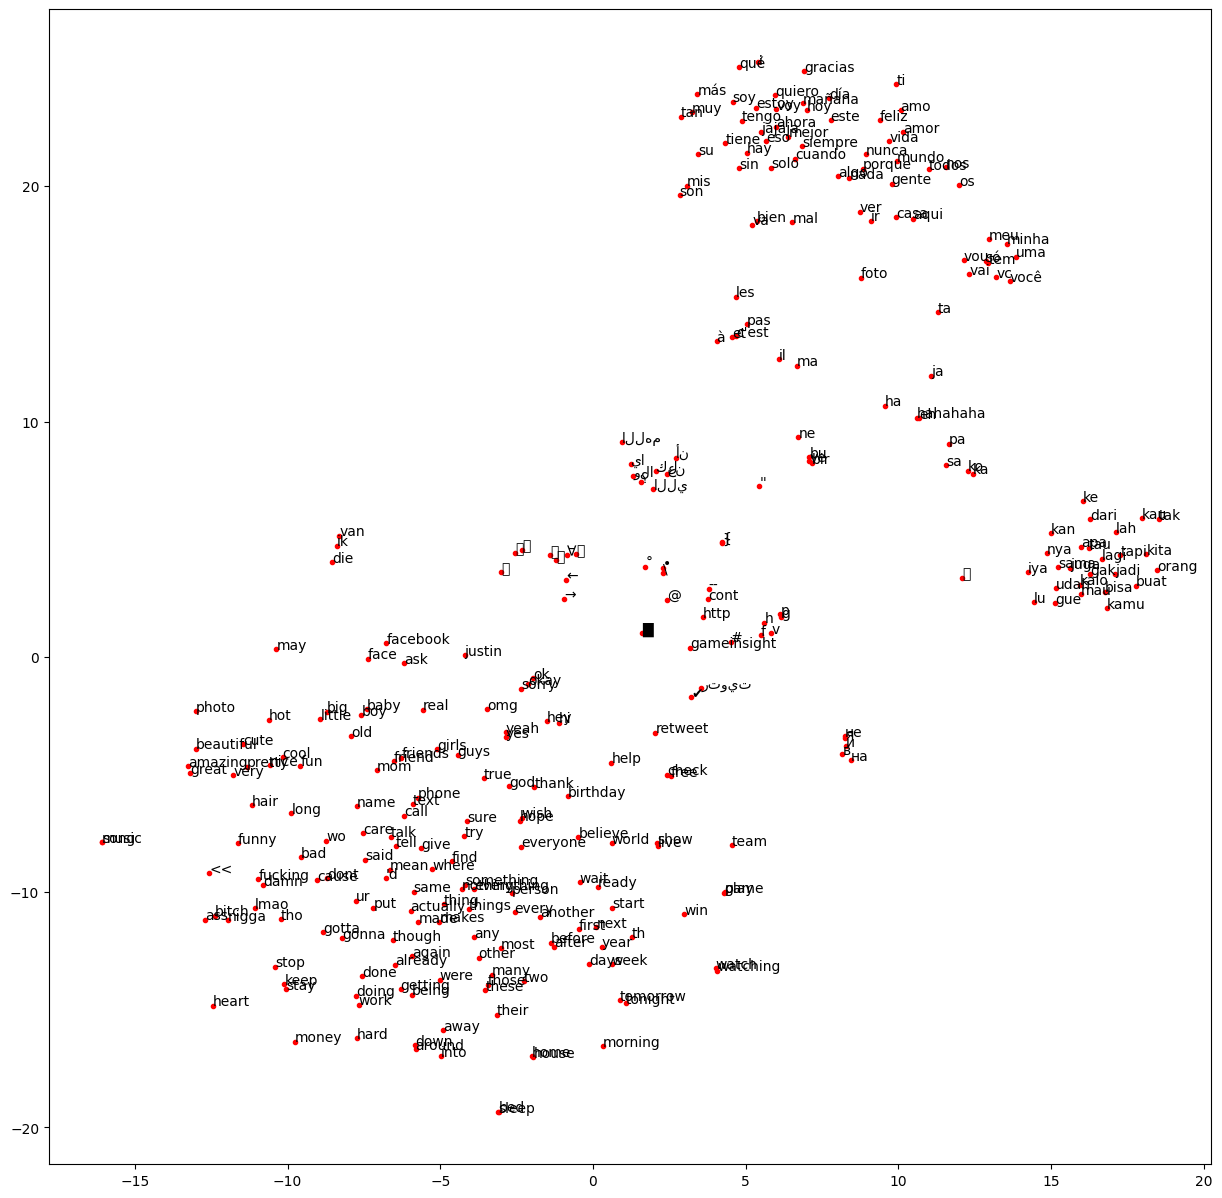

In [75]:
%matplotlib inline
plt.figure(figsize=(15,15))
idx = 0
for a in model2d[:300]:
    w = word_vectors.index_to_key[300+idx]
    plt.plot(a[0],a[1],'r.')
    plt.text(a[0],a[1],w)
    idx += 1
plt.show()

## Entrenando nuestras propias representaciones vectoriales

![we](https://miro.medium.com/v2/resize:fit:2000/1*SYiW1MUZul1NvL1kc1RxwQ.png)

### Obteniendo datos

![](https://data-and-the-world.onrender.com/posts/read-wikipedia-dump/dump_file_list.png)

Trabajaremos con una parte de la wikipedia en español. Usaremos la herramienta [wikiextractor](https://github.com/attardi/wikiextractor) y obtendremos los datos de la página: https://dumps.wikimedia.org/eswiki/

In [ ]:
!pip install wikiextractor

In [77]:
import urllib.request
from tqdm import tqdm

#CORPORA_DIR = "corpora/word2vec/"
CORPORA_DIR = "drive/MyDrive/corpora/word2vec/"

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# url = "https://dumps.wikimedia.org/eswiki/latest/eswiki-latest-pages-articles1.xml-p1p159400.bz2"
#url = "https://dumps.wikimedia.org/eswiki/latest/eswiki-latest-pages-articles2.xml-p159401p693323.bz2"
url = "https://dumps.wikimedia.org/eswiki/latest/eswiki-latest-pages-articles3.xml-p693324p1897740.bz2"
filename = CORPORA_DIR + "eswiki-articles3.bz2"

with tqdm(unit='B', unit_scale=True, unit_divisor=1024, miniters=1, desc=filename) as t:
    urllib.request.urlretrieve(url, filename, reporthook=lambda block_num, block_size, total_size: t.update(block_size))

In [88]:
import multiprocessing
multiprocessing.cpu_count()

2

In [78]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.222
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
%%time
!python -m wikiextractor.WikiExtractor "corpora/word2vec/eswiki-articles-1.bz2" --processes 24 -o "corpora/word2vec/eswiki-dump-1"

INFO: Preprocessing 'corpora/word2vec/eswiki-articles-1.bz2' to collect template definitions: this may take some time.
INFO: Loaded 290 templates in 23.3s
INFO: Starting page extraction from corpora/word2vec/eswiki-articles-1.bz2.
INFO: Using 24 extract processes.
INFO: Finished 24-process extraction of 63910 articles in 25.7s (2482.1 art/s)
CPU times: user 372 ms, sys: 18.7 ms, total: 391 ms
Wall time: 49.2 s


In [79]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


class WikiSentencesExtractor(object):

    def __init__(self, directory, max_lines):
        self.directory = directory
        self.max_lines = max_lines
        self.total_sentences = 0

    @staticmethod
    def preprocess(text: str) -> list:
        if len(text) <= 3 or text.startswith("<"):
            return []
        text = text.lower()
        text = re.sub(f'[^\w\s]', '', text)

        words = word_tokenize(text, language="spanish")

        stop_words = set(stopwords.words("spanish"))
        words = [token for token in words if token not in stop_words]
        words = [token for token in words if token.isalpha() and len(token) > 2]
        return words

    def get_sentences(self):
        for subdir_letter in os.listdir(self.directory):
            file_path = os.path.join(self.directory, subdir_letter)
            for file_name in os.listdir(file_path):
                with open(os.path.join(file_path, file_name)) as file:
                    for line in file:
                        if self.max_lines == self.total_sentences:
                            return
                        words = self.preprocess(line)
                        if not words:
                            continue
                        yield words
                        self.total_sentences += 1

    def __iter__(self):
        return self.get_sentences()

    def __len__(self):
        return self.total_sentences

In [80]:
directory = CORPORA_DIR + "eswiki-dump"
os.listdir(directory)

['AA', 'AB', 'AC', 'AD', 'AE']

In [81]:
%%time
sentences = WikiSentencesExtractor(directory, 3)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 18.4 µs


In [82]:
for sentence in sentences:
    print(sentence)

['andorra']
['andorra', 'oficialmente', 'principado', 'andorra', 'microestado', 'soberano', 'litoral', 'ubicado', 'suroeste', 'europa', 'españa', 'francia', 'límite', 'península', 'ibérica', 'constituye', 'independiente', 'derecho', 'democrático', 'social', 'cuya', 'forma', 'gobierno', 'coprincipado', 'parlamentario', 'territorio', 'organizado', 'siete', 'parroquias', 'población', 'total', 'habitantes', 'febrero', 'capital', 'andorra', 'vieja']
['extensión', 'territorial', 'andorra', 'microestado', 'grande', 'europa', 'situado', 'pirineos', 'españa', 'francia', 'altitud', 'media', 'limita', 'sur', 'españa', 'provincia', 'catalana', 'lérida', 'norte', 'francia', 'departamentos', 'ariège', 'pirineos', 'orientales', 'occitania', 'pertenece', 'culturalmente', 'europa', 'latina']


In [83]:
from gensim.models import word2vec, FastText

In [84]:
#MODELS_DIR = "models/word2vec/"
MODELS_DIR = "drive/MyDrive/models/word2vec/"

In [92]:
%%time
model_name = MODELS_DIR + "eswiki-test.model"
try:
    print(f"Searching for model {model_name}")
    model = word2vec.Word2Vec.load(model_name)
    print("Model found!!!")
except Exception as e:
    print(f"Modelo {model_name} not found. Train a new one")
    model = word2vec.Word2Vec(
        list(WikiSentencesExtractor(directory, max_lines=100000)),
        vector_size=100,
        window=5,
        workers=multiprocessing.cpu_count()
        )
    model.save(model_name)
    print(f"Finish train for model {model_name}")

Searching for model drive/MyDrive/models/word2vec/eswiki-test.model
Model found!!!
CPU times: user 136 ms, sys: 7.05 ms, total: 143 ms
Wall time: 373 ms


In [ ]:
# Probando mi modelo

In [93]:
from enum import Enum

class Algorithms(Enum):
    CBOW = "CBOW"
    SKIP_GRAM = "SKIP_GRAM"
    FAST_TEXT = "FAST_TEXT"

In [94]:
def load_model(model_path: str):
    try:
        return word2vec.Word2Vec.load(model_path)
    except:
        print(f"[WARN] Model not found in path {model_path}")
        return None

In [95]:
def train_model(sentences, model_name: str, vector_size: int, window=5, workers=2, algorithm = Algorithms.CBOW):
    model_name_params = f"{model_name}-vs{vector_size}-w{window}-{algorithm.value}.model"
    model_path = MODELS_DIR + model_name_params
    if load_model(model_path) is not None:
        print(f"Already exists the model {model_path}")
        return load_model(model_path)
    print(f"TRAINING: {model_path}")
    if algorithm in [Algorithms.CBOW, Algorithms.SKIP_GRAM]:
        algorithm_number = 1 if algorithm == Algorithms.SKIP_GRAM else 0
        model = word2vec.Word2Vec(
            sentences,
            vector_size=vector_size,
            window=window,
            workers=workers,
            sg = algorithm_number,
            seed=42,
            )
    elif algorithm == Algorithms.FAST_TEXT:
        model = FastText(sentences=sentences, vector_size=vector_size, window=window, workers=workers, seed=42, epochs=100)
    else:
        print("[ERROR] algorithm not implemented yet :p")
        return
    model.save(model_path)
    return model

In [96]:
def report_stats(model) -> None:
    """Print report of a model"""
    print("Number of words in the corpus used for training the model: ", model.corpus_count)
    print("Number of words in the model: ", len(model.wv.index_to_key))
    print("Time [s], required for training the model: ", model.total_train_time)
    print("Count of trainings performed to generate this model: ", model.train_count)
    print("Length of the word2vec vectors: ", model.vector_size)
    print("Applied context length for generating the model: ", model.window)

### CBOW

In [97]:
%%time
cbow_100 = train_model(
    WikiSentencesExtractor(directory, -1),
    "eswiki-medium",
    vector_size=100,
    window=5,
    workers=24,
    algorithm=Algorithms.CBOW
    )

Already exists the model drive/MyDrive/models/word2vec/eswiki-medium-vs100-w5-CBOW.model
CPU times: user 3.45 s, sys: 374 ms, total: 3.82 s
Wall time: 11.2 s


In [98]:
report_stats(cbow_100)

Number of words in the corpus used for training the model:  1379602
Number of words in the model:  192810
Time [s], required for training the model:  1190.6429741439988
Count of trainings performed to generate this model:  1
Length of the word2vec vectors:  100
Applied context length for generating the model:  5


### Skip gram

In [99]:
%%time
skip_gram_100 = train_model(WikiSentencesExtractor(directory, -1), "eswiki-medium", 100, 5, workers=24, algorithm=Algorithms.SKIP_GRAM)

Already exists the model drive/MyDrive/models/word2vec/eswiki-medium-vs100-w5-SKIP_GRAM.model
CPU times: user 3.38 s, sys: 388 ms, total: 3.77 s
Wall time: 11.9 s


In [ ]:
report_stats(skip_gram_100)

### fastText

fastText toma en cuenta la estructura morfologica de las palabras. Esta estructura no es tomada en cuenta en los modelos tradicionales de Word2Vec.

Para hacerlo con fastText se toma la palabra como un agregado de sub-tokens que generalmente y por simplicidad se calculan como los n-gramas de la palabra.

Sauce- https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#fasttext-model

In [100]:
%%time
fastext_300 = train_model(
    WikiSentencesExtractor(directory, -1),
    "eswiki-medium",
    300,
    5,
    workers=24,
    algorithm=Algorithms.FAST_TEXT
    )

Already exists the model drive/MyDrive/models/word2vec/eswiki-medium-vs300-w5-FAST_TEXT.model
CPU times: user 33.3 s, sys: 11.6 s, total: 45 s
Wall time: 1min 55s


In [ ]:
report_stats(fastext_300)

## Operaciones con los vectores entrenados

Veremos operaciones comunes sobre vectores. Estos resultados dependeran del modelo que hayamos cargado en memoria

In [101]:
models = {
    Algorithms.CBOW: cbow_100,
    Algorithms.SKIP_GRAM: skip_gram_100,
    Algorithms.FAST_TEXT: fastext_300
}

In [102]:
model = models[Algorithms.FAST_TEXT]

In [103]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 100:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/192810 is años
word #1/192810 is dos
word #2/192810 is parte
word #3/192810 is ser
word #4/192810 is ciudad
word #5/192810 is año
word #6/192810 is gran
word #7/192810 is después
word #8/192810 is puede
word #9/192810 is así
word #10/192810 is primera
word #11/192810 is forma
word #12/192810 is aunque
word #13/192810 is mayor
word #14/192810 is mismo
word #15/192810 is además
word #16/192810 is tras
word #17/192810 is gobierno
word #18/192810 is vez
word #19/192810 is guerra
word #20/192810 is tres
word #21/192810 is primer
word #22/192810 is nombre
word #23/192810 is solo
word #24/192810 is san
word #25/192810 is embargo
word #26/192810 is cada
word #27/192810 is historia
word #28/192810 is país
word #29/192810 is lugar
word #30/192810 is según
word #31/192810 is nacional
word #32/192810 is tiempo
word #33/192810 is general
word #34/192810 is sido
word #35/192810 is mientras
word #36/192810 is población
word #37/192810 is sistema
word #38/192810 is hacia
word #39/192810 is pue

In [104]:
gato_vec = model.wv["gato"]
print(gato_vec[:10])
print(len(gato_vec))

[-2.1755216   5.490312   -0.67907053 -4.512126   -2.53253     1.857867
 -1.1126716   1.3537124   2.1651037  -0.5407142 ]
300


In [106]:
try:
    agustisidad_vec = model.wv["agusticidad"]
except KeyError:
    print("OOV founded!")


In [107]:
agustisidad_vec[:10]
len(agustisidad_vec)

300

In [108]:
model.wv.most_similar("agusticidad", topn=5)

[('rusticidad', 0.8210344314575195),
 ('elipticidad', 0.7197962999343872),
 ('plasticidad', 0.6998510360717773),
 ('mendicidad', 0.6969987154006958),
 ('espasticidad', 0.6963685154914856)]

Podemos ver como la similitud entre palabras decrece

In [109]:
word_pairs = [
    ("automóvil", "camion"),
    ("automóvil", "bicicleta"),
    ("automóvil", "cereal"),
    ("automóvil", "conde"),
]

for w1, w2 in word_pairs:
    print(f"{w1} - {w2} {model.wv.similarity(w1, w2)}")

automóvil - camion 0.46221646666526794
automóvil - bicicleta 0.5165674686431885
automóvil - cereal 0.03914599493145943
automóvil - conde -0.043139636516571045


In [ ]:
# rey es a hombre como ___ a mujer
# londres es a inglaterra como ____ a vino
model.wv.most_similar(positive=['vida', 'enfermedad'], negative=['salud'])

[('peliosis', 0.5060585737228394),
 ('hipgnosis', 0.46295005083084106),
 ('borreliosis', 0.4533087909221649),
 ('infección', 0.4477004408836365),
 ('treponematosis', 0.4457964301109314),
 ('sobrevida', 0.44000673294067383),
 ('histoplasmosis', 0.43974003195762634),
 ('demencia', 0.43940383195877075),
 ('miosis', 0.4361937940120697),
 ('prognosis', 0.43558117747306824)]

In [ ]:
model.wv.doesnt_match(["disco", "música", "mantequilla", "cantante"])

'mantequilla'

In [ ]:
model.wv.similarity("noche", "noches")

0.6372572

In [ ]:
model.wv.most_similar("nochecitas", topn=10)

[('noches', 0.7725561261177063),
 ('mañanas', 0.671513020992279),
 ('mañanitas', 0.6642985343933105),
 ('nocheros', 0.6344171762466431),
 ('cabecitas', 0.6314725875854492),
 ('cenas', 0.6220517754554749),
 ('madrugadas', 0.6209020018577576),
 ('piedrecitas', 0.6094605326652527),
 ('verbenas', 0.6038253903388977),
 ('panochas', 0.6034460663795471)]

### Ejemplos destacables

- [Tutorial Word Embedding](https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/index.html)
- [Demo](https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/index.html)

# Práctica 5: Reducción de la dimensionalidad

**Fecha de entrega: 13 de abril 2024 11:59pm**

Hay varios métodos que podemos aplicar para reduccir la dimensionalidad de nuestros vectores y asi poder visualizar en un espacio de menor dimensionalidad como estan siendo representados los vectores.

- PCA
- T-SNE
- SVD

- Entrenar un modelo word2vec
  - Utilizar como corpus la wikipedia como en la practica
  - Adaptar el tamaño de ventana y corpus a sus recursos de computo
  - Ej: Entrenar en colab con ventana de 5 y unas 100k sentencias toma ~1hr
- Aplicar los 3 algoritmos de reduccion de dimensionalidad
    - Reducir a 2d
    - Plotear 1000 vectores de las palabras más frecuentes
- Analizar y comparar las topologías que se generan con cada algoritmo
  - ¿Se guardan las relaciones semánticas? si o no y porqué

# Referencias

- [Verctor Representations - Dr. Johannes Maucher](https://hannibunny.github.io/nlpbook/05representations/05representationsintro.html)
- [Word Embeddings - Lenia Voita](https://lena-voita.github.io/nlp_course/word_embeddings.html#pre_neural)
- Partes del código utilizado para este notebook fueron tomados de trabajos de la [Dr. Ximena Gutierrez-Vasques](https://github.com/ximenina/) y el [Dr. Victor Mijangos](https://github.com/VMijangos/LinguisticaComputacional/blob/main/Notebooks/19%20Word2Vec.ipynb)
- [Corpus streaming on gensim](https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#corpus-streaming-one-document-at-a-time)
- [Gensim docs](https://radimrehurek.com/gensim/auto_examples/index.html)